### Step 1: Importing the required libraries to get the email data

In [103]:
import imaplib
import email
import getpass
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


### Step 2: Gaining access to the email address

In [22]:
username =  input("Enter the email address: ")
password = getpass.getpass("Enter password: ")
mail = imaplib.IMAP4_SSL('imap.gmail.com')
mail.login(username, password)

Enter the email address: ntrieua@gmail.com
Enter password: ········


('OK', [b'ntrieua@gmail.com authenticated (Success)'])

### Step 3: Get list of all mailboxes

In [30]:
print(mail.list())
mail.select("inbox")

('OK', [b'(\\HasNoChildren) "/" "Cron jobs"', b'(\\HasNoChildren) "/" "Entertainment"', b'(\\HasNoChildren) "/" "Facebook"', b'(\\HasNoChildren) "/" "INBOX"', b'(\\HasNoChildren) "/" "Notes"', b'(\\HasNoChildren) "/" "Outbox"', b'(\\HasNoChildren) "/" "Receipts"', b'(\\HasNoChildren) "/" "Study"', b'(\\HasChildren) "/" "Work"', b'(\\HasNoChildren) "/" "Work/Applications"', b'(\\HasNoChildren) "/" "Work/Bitcoin"', b'(\\HasNoChildren) "/" "[Drafts]"', b'(\\HasChildren \\Noselect) "/" "[Gmail]"', b'(\\All \\HasNoChildren) "/" "[Gmail]/All Mail"', b'(\\Drafts \\HasNoChildren) "/" "[Gmail]/Drafts"', b'(\\HasNoChildren \\Important) "/" "[Gmail]/Important"', b'(\\HasNoChildren \\Sent) "/" "[Gmail]/Sent Mail"', b'(\\HasNoChildren \\Junk) "/" "[Gmail]/Spam"', b'(\\Flagged \\HasNoChildren) "/" "[Gmail]/Starred"', b'(\\HasNoChildren \\Trash) "/" "[Gmail]/Trash"', b'(\\HasChildren) "/" "me2me"', b'(\\HasNoChildren) "/" "me2me/Project 1"'])


('OK', [b'33033'])

### Step 4: Fetch first a smaple of 100 emails

In [39]:
"""Searching for emails in the mailbox"""
result, numbers = mail.uid('search', None, "ALL")
uids = numbers[0].split()
uids = [id.decode("utf-8") for id in uids ]
uids = uids[-1:-101:-1]

In [40]:
"""Fetching the desired content"""
result, messages = mail.uid('fetch', ','.join(uids), '(BODY[HEADER.FIELDS (SUBJECT FROM DATE)])')

### Step 5: Put to dataframe


In [68]:
"""Iterating through what was fetched, making it an email object and saving it to a dataframe"""
date_list = []
from_list = [] 
subject_text = []
for _, message in messages[::2]:
    msg = email.message_from_bytes(message)
    decode = email.header.decode_header(msg['Subject'])[0]
    if isinstance(decode[0],bytes):
        decoded = decode[0].decode(errors="ignore")
        subject_text.append(decoded)
    else:
        subject_text.append(decode[0])
      
    date_list.append(msg.get('date'))
    fromlist = msg.get('From')
    #fromlist = fromlist.split("@")[0].replace('"', '')
    from_list1.append(fromlist)
date_list = pd.to_datetime(date_list1)
date_list1 = []
for item in date_list:
    date_list1.append(item.isoformat(' ')[:-6])
print(len(subject_text))
#print(len(from_list1))
print(len(date_list1))
#print(from_list1)
df1 = pd.DataFrame(data={'Date':date_list1,'Subject':subject_text})
print(df1.head(10))
df1.to_csv('inbox_email.csv',index=False)

100
100
            Date                                            Subject
0  2020-08-03 20           2 New Listings Matching Your Preferences
1  2020-08-03 20  Here’s how I Learned Just Enough Programming f...
2  2020-08-03 20      Akki Tweeted: Best thing you'll see today 😀❤️
3  2020-08-03 15  Top Specializations in Data Science, Tech, and...
4  2020-08-03 21  Your Dependabot alerts for the week of Jul 28 ...
5  2020-08-03 22          Flash Sale - 20% Off Selected Products! ⚡
6  2020-08-03 22                 It's tool time - NEW Bahco tools 🔧
7  2020-08-03 23  Redvespa Consultants Limited is looking for: C...
8  2020-08-04 11                          These specials are FIRE 🔥
9  2020-08-04 11                          These specials are FIRE 🔥


## Data visualization

In [69]:
"""Opening and viewing the csv"""
emails = pd.read_csv("inbox_email.csv")
emails.head()

,Date,Subject
0,2020-08-03 20,2 New Listings Matching Your Preferences
1,2020-08-03 20,Here’s how I Learned Just Enough Programming f...
2,2020-08-03 20,Akki Tweeted: Best thing you'll see today 😀❤️
3,2020-08-03 15,"Top Specializations in Data Science, Tech, and..."
4,2020-08-03 21,Your Dependabot alerts for the week of Jul 28 ...


In [70]:

"""Statistical data"""
emails.describe()

,Date,Subject
count,100,100
unique,48,78
top,2020-08-05 18,New feedback on your submission
freq,7,8


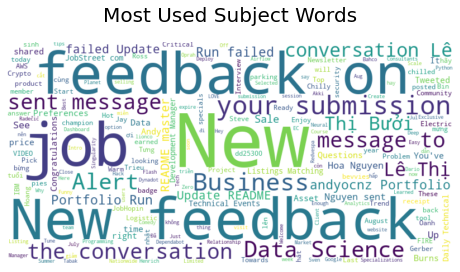

In [75]:
"""Using Wordcloud to see the most used words in the email subjects""" 
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

 
# Create a list of words
text = ""
for item in emails["Subject"]:
  if isinstance(item,str):
    text += " " + item
  text.replace("'", "")
  text.replace(",","")
  text.replace('"','')


# Create the wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color="white")

# Display the generated image:
wordcloud.generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Most Used Subject Words", fontsize=20,ha="center", pad=20)
plt.show()

In [92]:
# Reformat datetime
emails['Date'] = pd.to_datetime(emails.Date)

In [96]:
#groupby and count email by date
emails1 = emails.groupby(emails['Date'].dt.date).size().reset_index(name='Count')

In [98]:
#check
emails1.head()

,Date,Count
0,2020-08-03,16
1,2020-08-04,28
2,2020-08-05,47
3,2020-08-06,9


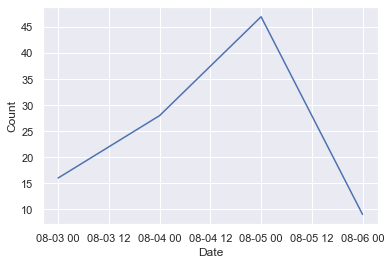

In [102]:
#Plot
ax = sns.lineplot(x="Date", y="Count", data=emails1)